In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
sns.set(style="whitegrid")

# Import

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
#source: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
#https://www.kaggle.com/anshuls235/covid19-explained-through-visualizations


df = df.melt(id_vars=['UID',
                 'iso2',
                 'iso3',
                 'code3',
                 'FIPS',
                 'Admin2',
                 'Province_State',
                 'Country_Region',
                 'Lat',
                 'Long_',
                 'Combined_Key'], 
        var_name="Date", 
        value_name="Confirmed Cases")



df['Date'] = pd.to_datetime(df['Date'])

df.Date.max()

Timestamp('2021-12-31 00:00:00')

In [3]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",2020-01-22,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",2020-01-22,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",2020-01-22,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",2020-01-22,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",2020-01-22,0


# County

In [4]:
#df_st = df.groupby(['Province_State','Date'],as_index=False).sum('Confirmed Cases')[['Province_State','Date','Confirmed Cases']]

df_c = df.sort_values(by=['Combined_Key', 'Date'])
df_c['Confirmed Cases']=df_c['Confirmed Cases'].astype('int')
df_c['new_cases']=df_c.groupby(['Combined_Key'])[['Confirmed Cases']].diff().fillna(0)
df_c['Confirmed_Cases_log']= np.log(df_c['Confirmed Cases']+1)
df_c.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed Cases,new_cases,Confirmed_Cases_log
2487,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-01-22,0,0.0,0.0
5829,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-01-23,0,0.0,0.0
9171,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-01-24,0,0.0,0.0
12513,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-01-25,0,0.0,0.0
15855,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-01-26,0,0.0,0.0


In [5]:
df_c = df_c.sort_values('Date')
df_c ['7day_avg']=df_c.groupby('Combined_Key')['new_cases'].transform(lambda x: x.rolling(7, 1).mean())
df_c ['7day_std']=df_c.groupby('Combined_Key')['new_cases'].transform(lambda x: x.rolling(7, 1).std())
#df_c ['14day_avg']=df_c.groupby('Combined_Key')['new_cases'].transform(lambda x: x.rolling(14, 1).mean())
#df_c ['21day_avg']=df_c.groupby('Combined_Key')['new_cases'].transform(lambda x: x.rolling(21, 1).mean())

df_c ['7day_avg'] = round(df_c ['7day_avg'],2)
df_c ['7day_std'] = round(df_c ['7day_std'],2)
#df_c ['14day_avg'] = round(df_c ['14day_avg'],2)
#df_c ['21day_avg'] = round(df_c ['21day_avg'],2)

In [6]:
df_c[(df_c['Date']=='2021-12-31')].sort_values(by='Confirmed_Cases_log',ascending=False) [['Combined_Key','Confirmed Cases','Confirmed_Cases_log','new_cases','7day_avg','7day_std']].head(10)

,Combined_Key,Confirmed Cases,Confirmed_Cases_log,new_cases,7day_avg,7day_std
2369693,"Los Angeles, California, US",1696582,14.344127,27037.0,14477.57,9299.48
2369588,"Maricopa, Arizona, US",870996,13.677394,8539.0,2906.14,3161.93
2369862,"Miami-Dade, Florida, US",854670,13.658472,99926.0,14275.14,37768.48
2370120,"Cook, Illinois, US",821472,13.618854,0.0,8836.86,10710.47
2372278,"Harris, Texas, US",648088,13.381783,0.0,4323.71,6826.40
2371403,"Kings, New York, US",469753,13.059964,13483.0,10146.57,5150.13
2369712,"San Diego, California, US",451019,13.019267,6042.0,3006.14,3335.73
2369825,"Broward, Florida, US",442977,13.001275,48737.0,6962.43,18420.85
2372234,"Dallas, Texas, US",436400,12.986317,0.0,1284.86,1694.91
2371421,"Queens, New York, US",421769,12.952215,12372.0,8687.14,4494.02


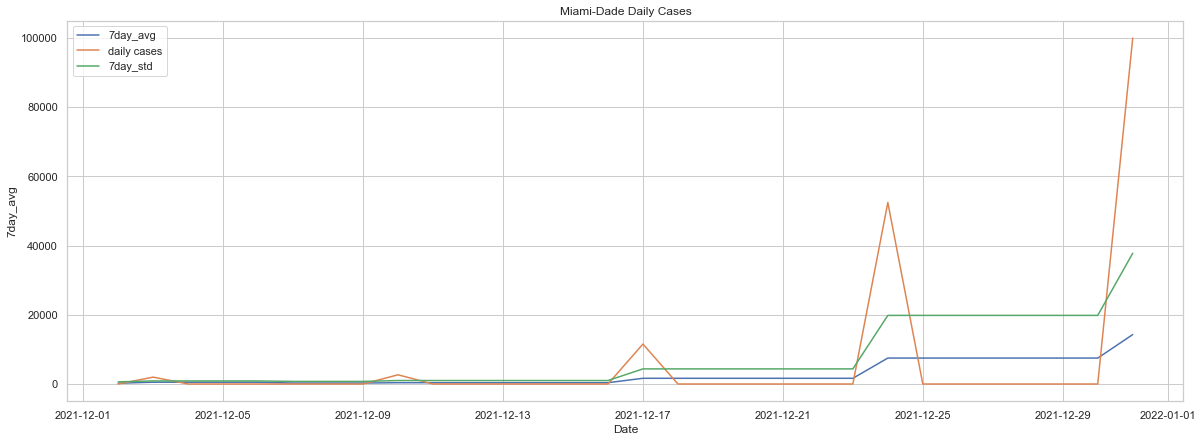

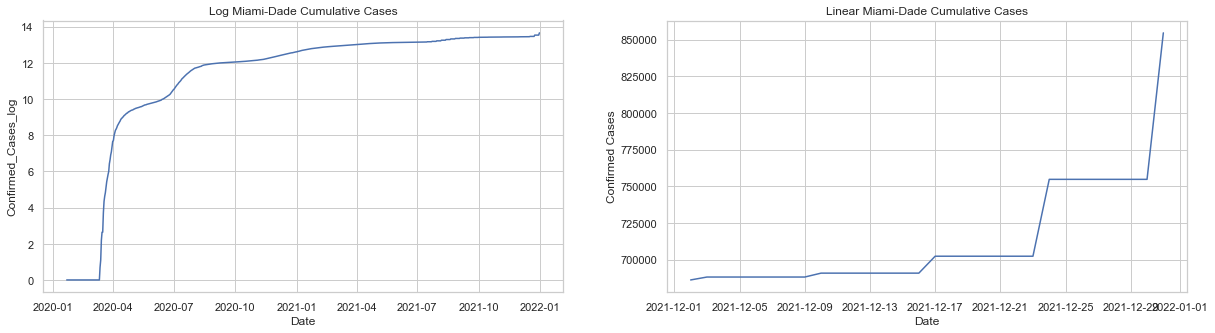

In [7]:
x = 'Miami-Dade'
y = '12-01-2021'


z=df_c[(df_c['Admin2']==x) & (df_c['Date']>y)]

plt.figure(figsize=(20,7))

ap = sns.lineplot(x='Date', y= "7day_avg",data= z,label = '7day_avg' )
#ap = sns.lineplot(x='Date', y= "14day_avg",data= z,label = '14day_avg' )
#ap = sns.lineplot(x='Date', y= "21day_avg",data= z ,label = '21day_avg')
ap = sns.lineplot(x='Date', y= "new_cases",data= z ,label = 'daily cases')
ap = sns.lineplot(x='Date', y= "7day_std",data= z ,label = '7day_std')

ap.set_title(x + ' Daily Cases')


fig, axs = plt.subplots(ncols=2,figsize=(20.5,5))

ax = sns.lineplot(x='Date', y= "Confirmed_Cases_log",data= df_c[df_c['Admin2']==x],ax=axs[0])
ax.set_title('Log '+ x + ' Cumulative Cases')
#ax.set(xscale='log')

bx= sns.lineplot(x='Date', y= "Confirmed Cases",data= z,ax=axs[1])
bx.set_title('Linear '+ x + ' Cumulative Cases')
#bx.set(xscale='linear')


plt.show()

#data appears not to be stationary

#https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
#https://www.weforum.org/agenda/2020/04/covid-19-spread-logarithmic-graph/

# ARIMA Forecasting (County)

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
#https://towardsdatascience.com/arima-forecasting-in-python-90d36c2246d3

In [10]:
df_p = df_c[df_c['Admin2']=='Miami-Dade']

In [11]:
result = adfuller(df_p['new_cases'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
    

# based on the adf statistic being greater than all critical values and
# the pvalue is > .05, we fail to reject the null hypothesis
# non stationary

ADF Statistic: -1.2994708502128647
p-value: 0.6294143655678521
Critical Values:
	1%: -3.4398214107097225
	5%: -2.8657196436385663
	10%: -2.5689957624690525


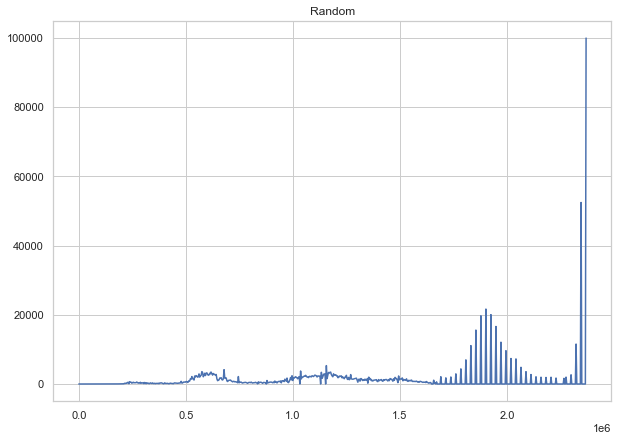

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(df_p['new_cases']);
plt.title('Random');

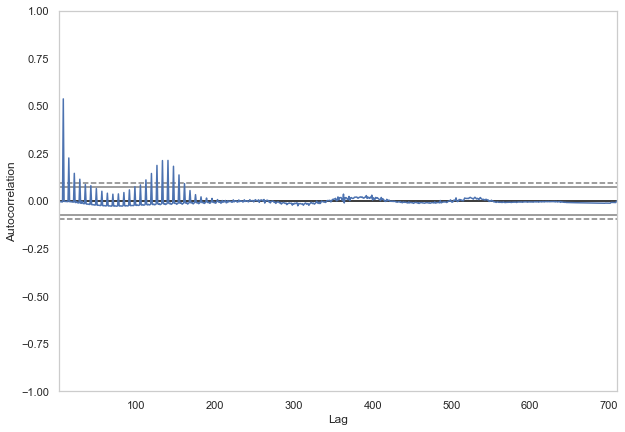

In [15]:
from pandas.plotting import autocorrelation_plot
fig, axes = plt.subplots(figsize=(10,7))
autocorrelation_plot(df_p['new_cases'])
plt.show()

In [16]:
model=ARIMA(df_p['new_cases'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\PRM\AppData\Local\Programs\Python\Python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\PRM\AppData\Local\Programs\Python\Python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\PRM\AppData\Local\Programs\Python\Python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_cases   No. Observations:                  710
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6975.884
Date:                Sat, 01 Jan 2022   AIC                          13957.767
Time:                        21:09:29   BIC                          13971.459
Sample:                             0   HQIC                         13963.057
                                - 710                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1704      0.108     -1.571      0.116      -0.383       0.042
ma.L1         -0.9019      0.037    -24.560      0.000      -0.974      -0.830
sigma2      2.055e+07   2.23e+05     92.253      0.000    2.01e+07     2.1e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):           2811661.21
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):             228.75   Skew:                            15.91
Prob(H) (two-sided):                  0.00   Kurtosis:                       309.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\PRM\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

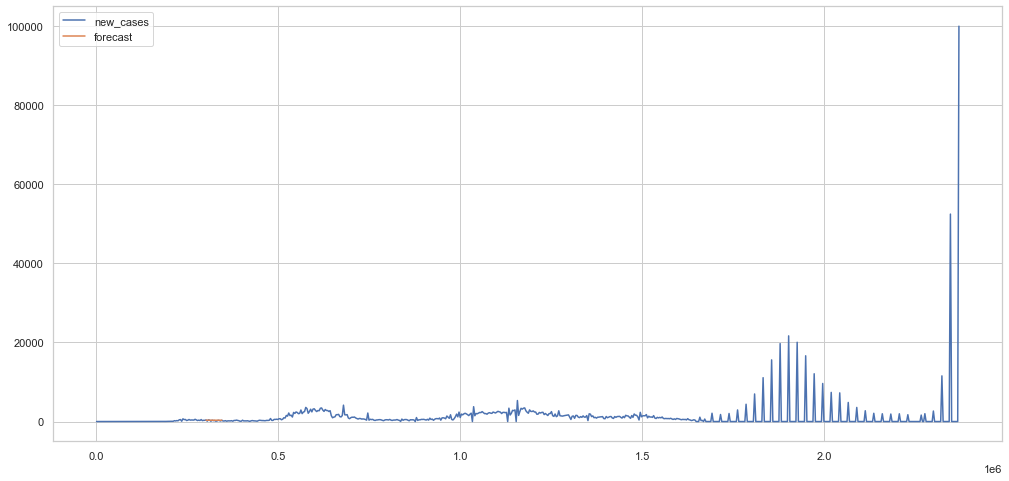

In [19]:
df_p['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df_p[['new_cases','forecast']].plot(figsize=(17,8))

C:\Users\PRM\AppData\Local\Programs\Python\Python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\PRM\AppData\Local\Programs\Python\Python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\PRM\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:>

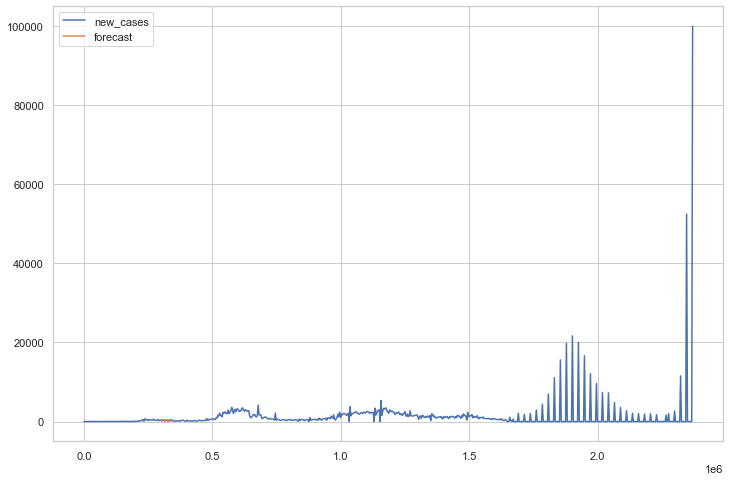

In [20]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_p['new_cases'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df_p['forecast']=results.predict(start=90,end=103,dynamic=True)
df_p[['new_cases','forecast']].plot(figsize=(12,8))

In [24]:
from pandas.tseries.offsets import DateOffset

future_dates=[df_p.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_p.columns)

future_datest_df.tail()

future_df=pd.concat([df_p,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['new_cases', 'forecast']].plot(figsize=(12, 8))

TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'

# State

In [9]:
df_st = df.groupby(['Province_State','Date'],as_index=False).sum('Confirmed Cases')[['Province_State','Date','Confirmed Cases']]

df_st = df_st.sort_values(by=['Province_State', 'Date'])
df_st['Confirmed Cases']=df_st['Confirmed Cases'].astype('int')
#df_st['Date']=df_st['Date'].astype('object')
df_st['new_cases']=df_st.groupby(['Province_State'])[['Confirmed Cases']].diff().fillna(0)
df_st['Confirmed_Cases_log']= np.log(df_st['Confirmed Cases']+1)

In [10]:
df_st = df_st.sort_values('Date')
df_st ['7day_avg']=df_st.groupby('Province_State')['new_cases'].transform(lambda x: x.rolling(7, 1).mean())
df_st ['14day_avg']=df_st.groupby('Province_State')['new_cases'].transform(lambda x: x.rolling(14, 1).mean())
df_st ['21day_avg']=df_st.groupby('Province_State')['new_cases'].transform(lambda x: x.rolling(21, 1).mean())

df_st ['7day_avg'] = round(df_st ['7day_avg'],2)
df_st ['14day_avg'] = round(df_st ['14day_avg'],2)
df_st ['21day_avg'] = round(df_st ['21day_avg'],2)

,Province_State,Date,Confirmed Cases,new_cases,Confirmed_Cases_log,7day_avg,14day_avg,21day_avg
0,Alabama,2020-01-22,0,0.0,0.0,0.0,0.0,0.0
18460,Michigan,2020-01-22,0,0.0,0.0,0.0,0.0,0.0
4970,Connecticut,2020-01-22,0,0.0,0.0,0.0,0.0,0.0
2130,Arizona,2020-01-22,0,0.0,0.0,0.0,0.0,0.0
29820,Oregon,2020-01-22,0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_st[(df_st['Date']=='2021-12-31')].sort_values(by='Confirmed_Cases_log',ascending=False)[['Province_State','Confirmed Cases','Confirmed_Cases_log','new_cases','7day_avg','14day_avg','21day_avg']].head(10)

,Province_State,Confirmed Cases,Confirmed_Cases_log,new_cases,7day_avg,14day_avg,21day_avg
4259,California,5515250,15.523028,58829.0,32192.29,22507.29,17211.71
35499,Texas,4581747,15.337591,648.0,14976.71,11648.07,9355.24
8519,Florida,4209927,15.252956,119927.0,43168.43,30503.14,21708.81
26269,New York,3480280,15.062624,78090.0,54036.86,39993.86,30989.43
12779,Illinois,2149548,14.580769,0.0,18320.86,14678.00,12609.76
31239,Pennsylvania,2036424,14.526706,21057.0,14090.14,11587.64,10386.90
29109,Ohio,2016082,14.516667,20585.0,15013.00,13336.79,11795.95
9229,Georgia,1839879,14.425211,23438.0,15182.71,10586.07,7673.00
19169,Michigan,1710325,14.352195,0.0,9249.57,6870.29,6797.48
26979,North Carolina,1686667,14.338266,19174.0,11327.00,6972.36,5733.24


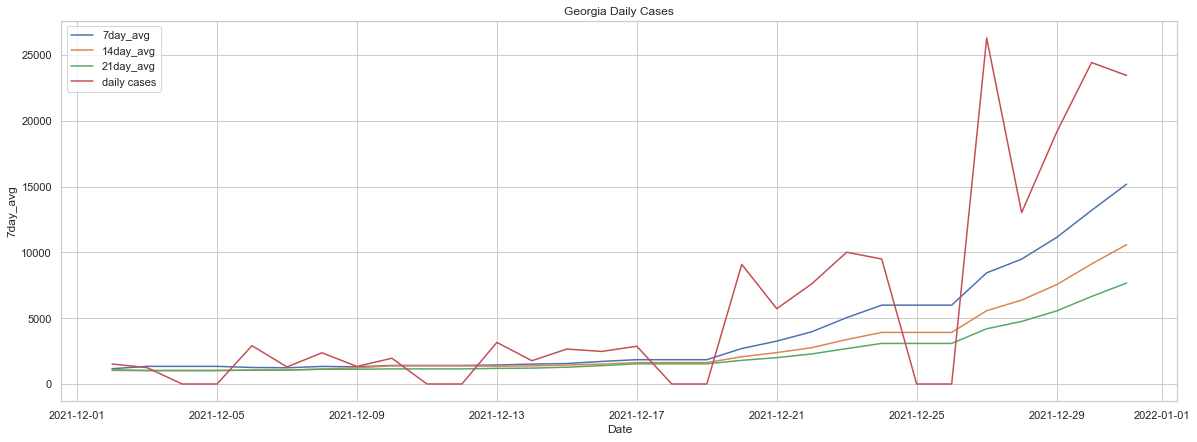

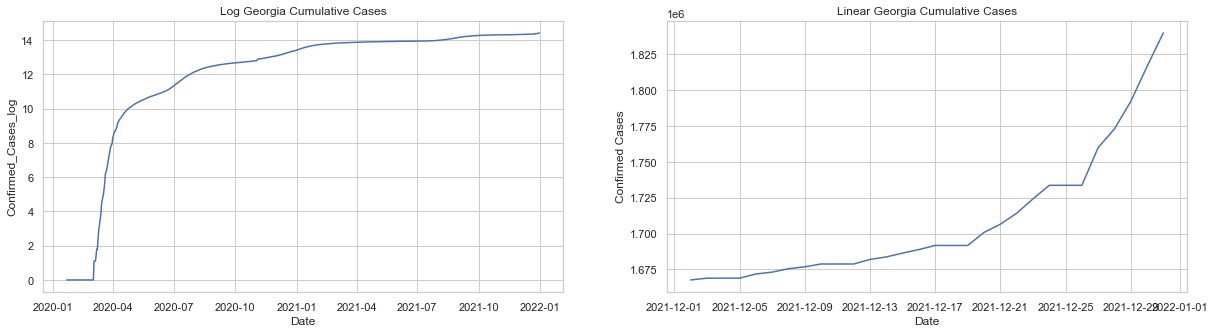

In [26]:
x = 'Georgia'
y = '12-01-2021'


z=df_st[(df_st['Province_State']==x) & (df_st['Date']>y)]

plt.figure(figsize=(20,7))
ap = sns.lineplot(x='Date', y= "7day_avg",data= z,label = '7day_avg' )
ap = sns.lineplot(x='Date', y= "14day_avg",data= z,label = '14day_avg' )
ap = sns.lineplot(x='Date', y= "21day_avg",data= z ,label = '21day_avg')
ap = sns.lineplot(x='Date', y= "new_cases",data= z ,label = 'daily cases')
ap.set_title(x + ' Daily Cases')

fig, axs = plt.subplots(ncols=2,figsize=(20.5,5))

ax = sns.lineplot(x='Date', y= "Confirmed_Cases_log",data= df_st[df_st['Province_State']==x],ax=axs[0])
ax.set_title('Log '+ x + ' Cumulative Cases')
#ax.set(xscale='log')

bx= sns.lineplot(x='Date', y= "Confirmed Cases",data= z,ax=axs[1])
bx.set_title('Linear '+ x + ' Cumulative Cases')
#bx.set(xscale='linear')


plt.show()

#https://www.weforum.org/agenda/2020/04/covid-19-spread-logarithmic-graph/

In [28]:
df_st.to_csv('state_cases.csv')

# Notes